In [2]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np

import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian
import model_graddesc as model
import defmod.registrationdata as regdata

torch.set_default_tensor_type(torch.DoubleTensor)

In [26]:
nb_pts = [7,7]
origin1 = [[0.,0.],[10.,0.]]
radius1 = [1.,2.]
transvec = [torch.tensor([0.,2.]), torch.tensor([0.,-1])]
scal = [1.5, 0.5]

data = regdata.PointCircles(nb_pts, origin1, radius1, transvec, scal)
data.build_modules()
source = data.source
target = data.target

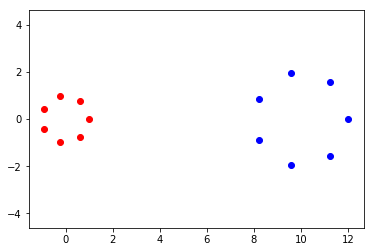

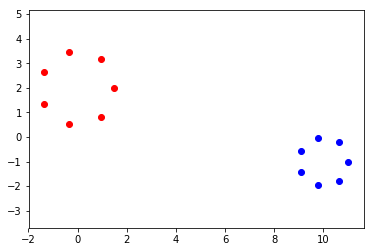

In [27]:
plt.figure()
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [28]:
modules = dm.multishape.MultiShapeModule([data.modules[0], data.modules[1]])
modules.fill_controls_zero()
constr_Id = dm.constraints.Identity_Silent()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [ ]:
# set parameters
reg_param = 10**-3 

gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
    
EnergyFunctional = model.EnergyFunctional(modules, H, constr_Id,source, target, 2, reg_param)

# do registration
X = [gd0_tensor, mom0_tensor]
X = model.gradientdescent(EnergyFunctional, X)

energy: constraints_________________
tensor([[ 7.2584e-05, -1.2305e-18],
        [ 4.5001e-05,  5.6220e-05],
        [-1.6356e-05,  7.0601e-05],
        [-6.4937e-05,  3.1598e-05],
        [-6.4937e-05, -3.1598e-05],
        [-1.6356e-05, -7.0601e-05],
        [ 4.5001e-05, -5.6220e-05],
        [ 7.2269e-04, -2.1154e-18],
        [ 4.4554e-04,  5.5453e-04],
        [-1.6487e-04,  7.0134e-04],
        [-6.4202e-04,  3.1564e-04],
        [-6.4202e-04, -3.1564e-04],
        [-1.6487e-04, -7.0134e-04],
        [ 4.4554e-04, -5.5453e-04]], grad_fn=<CatBackward>)
cost: 0.00201298819597 attach: 10.032845340790594
 iter : 0  ,total energy: 10.034858328986562
energy: constraints_________________
tensor([[ 7.2584e-05, -1.2305e-18],
        [ 4.5001e-05,  5.6220e-05],
        [-1.6356e-05,  7.0601e-05],
        [-6.4937e-05,  3.1598e-05],
        [-6.4937e-05, -3.1598e-05],
        [-1.6356e-05, -7.0601e-05],
        [ 4.5001e-05, -5.6220e-05],
        [ 7.2269e-04, -2.1154e-18],
        [ 4.455

cost: 0.00229366226306 attach: 5.928979949604011
energy: constraints_________________
tensor([[ 7.2621e-05, -1.3878e-17],
        [ 4.5023e-05,  5.6248e-05],
        [-1.6364e-05,  7.0637e-05],
        [-6.4970e-05,  3.1614e-05],
        [-6.4970e-05, -3.1614e-05],
        [-1.6364e-05, -7.0637e-05],
        [ 4.5023e-05, -5.6248e-05],
        [ 7.2269e-04, -4.1633e-17],
        [ 4.4553e-04,  5.5453e-04],
        [-1.6486e-04,  7.0134e-04],
        [-6.4201e-04,  3.1564e-04],
        [-6.4201e-04, -3.1564e-04],
        [-1.6486e-04, -7.0134e-04],
        [ 4.4553e-04, -5.5453e-04]], grad_fn=<CatBackward>)
cost: 0.00206764914636 attach: 10.179918438259577
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: False
c 1
 iter : 5  ,total energy: 10.181986087405935
energy: constraints_________________
tensor([[ 7.2584e-05,  5.5511e-17],
     

cost: 0.00219163631412 attach: 4.600916931501707
energy: constraints_________________
tensor([[ 7.2593e-05, -5.5511e-17],
        [ 4.5006e-05,  5.6226e-05],
        [-1.6358e-05,  7.0610e-05],
        [-6.4945e-05,  3.1602e-05],
        [-6.4945e-05, -3.1602e-05],
        [-1.6358e-05, -7.0610e-05],
        [ 4.5006e-05, -5.6226e-05],
        [ 7.2269e-04, -6.9389e-17],
        [ 4.4554e-04,  5.5453e-04],
        [-1.6487e-04,  7.0134e-04],
        [-6.4202e-04,  3.1564e-04],
        [-6.4202e-04, -3.1564e-04],
        [-1.6487e-04, -7.0134e-04],
        [ 4.4554e-04, -5.5453e-04]], grad_fn=<CatBackward>)
cost: 0.00218604798411 attach: 4.589866362531067
c 0
 iter : 11  ,total energy: 4.592052410515181
energy: constraints_________________
tensor([[ 7.2593e-05, -5.5511e-17],
        [ 4.5006e-05,  5.6226e-05],
        [-1.6358e-05,  7.0610e-05],
        [-6.4945e-05,  3.1602e-05],
        [-6.4945e-05, -3.1602e-05],
        [-1.6358e-05, -7.0610e-05],
        [ 4.5006e-05, -5.6226e-05],

cost: 0.00219205347564 attach: 4.583316060637095
c 0
 iter : 17  ,total energy: 4.585508114112739
energy: constraints_________________
tensor([[ 7.2593e-05,  1.9429e-16],
        [ 4.5006e-05,  5.6226e-05],
        [-1.6358e-05,  7.0610e-05],
        [-6.4945e-05,  3.1602e-05],
        [-6.4945e-05, -3.1602e-05],
        [-1.6358e-05, -7.0610e-05],
        [ 4.5006e-05, -5.6226e-05],
        [ 7.2269e-04,  1.1102e-16],
        [ 4.4554e-04,  5.5453e-04],
        [-1.6487e-04,  7.0134e-04],
        [-6.4201e-04,  3.1564e-04],
        [-6.4201e-04, -3.1564e-04],
        [-1.6487e-04, -7.0134e-04],
        [ 4.4554e-04, -5.5453e-04]], grad_fn=<CatBackward>)


In [9]:
#%matplotlib qt5
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])

states, controls = dm.shooting.shoot_euler(H, it=10)

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(states)))

plt.figure()
for s,c in zip(states, colors):
    plt.scatter(s[0][0].gd.view(-1,2)[:, 0].detach().numpy(), s[0][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[1][0].gd.view(-1,2)[:, 0].detach().numpy(), s[1][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[2][0].gd.view(-1,2)[:, 0].detach().numpy(), s[2][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[2][1].gd.view(-1,2)[:, 0].detach().numpy(), s[2][1].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
plt.plot(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), 'xk')
plt.plot(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), 'xk')

plt.plot(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), '.k')
plt.plot(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), '.k')

    
plt.axis('equal')
plt.show()

In [ ]:
# Visualization of grid deformation for each submodule
nx, ny = 30, 30
sx, sy = 30, 30
x, y = torch.meshgrid([torch.arange(0, nx), torch.arange(0, ny)])
x = sx*(x.type(torch.DoubleTensor)/nx - 0.5)
y = sy*(y.type(torch.DoubleTensor)/ny - 0.5)

gridpoints = dm.usefulfunctions.grid2vec(x, y).type(torch.DoubleTensor)


phi = mm.largeDeformation(modules, states, controls, gridpoints)
x1, y1 = dm.usefulfunctions.vec2grid(phi[0], nx, ny)
x2, y2 = dm.usefulfunctions.vec2grid(phi[1], nx, ny)
x3, y3 = dm.usefulfunctions.vec2grid(phi[2], nx, ny)



mm.plot_grid( x1.detach().numpy(), y1.detach().numpy(), color = 'blue')
mm.plot_grid(x2.detach().numpy(), y2.detach().numpy(), color = 'blue')
mm.plot_grid( x3.detach().numpy(), y3.detach().numpy(), color = 'blue')
plt.show()


In [11]:
modules.module_list[0].module_list

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.geodesic_controls()
                
        return H()
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), rais\gride_exception=True)

gd = gd0_tensor
mom = 1000*torch.rand(mom0_tensor.shape)


test_gradcheck_Hamiltonian()

In [ ]:
def test_gradcheck_EnergyFunctional():
    def energy(gd, mom):

        return model.EnergyFunctional(H.module, H, constr_Id,source, target, 2, reg_param).energy_tensor(gd, mom)
    return torch.autograd.gradcheck(energy, (gd, mom), raise_exception=True)

gd = gd0_tensor
mom = mom0_tensor


test_gradcheck_EnergyFunctional()

In [ ]:
def test_gradcheck_shooting():
    def shooting(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        
        intermediate_states, intermediate_controls = dm.shooting.shoot_euler(H, it=2)
        return H.module.manifold.unroll_cotan()
    return torch.autograd.gradcheck(shooting, (gd, mom), raise_exception=True,atol=1e-2)

test_gradcheck_shooting()

In [ ]:
def test_gradcheck_attachement():
    def attach(gd, mom):
        reg_param = 10**-3 

        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        energyfunc = model.EnergyFunctional(H.module, H, constr_Id,source, target, 2, reg_param)

        return energyfunc.attach() 
    return torch.autograd.gradcheck(attach, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd(),0).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan(),0).requires_grad_().view(-1)

test_gradcheck_attachement()

In [ ]:
def test_gradcheck_EnergyFunctional():
    def energy(gd, mom):
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.module.compute_geodesic_variables(constr_Id)
        return H.module.controls[0]
    return torch.autograd.gradcheck(energy, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd(),0).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan(),0).requires_grad_().view(-1)

test_gradcheck_EnergyFunctional()

In [ ]:
def test_gradcheck_autoaction():
    def autoaction(gd, mom):
        mod.manifold.fill_gd(gd)
        mod.manifold.fill_cotan(mom)
        return mod.autoaction()
    return torch.autograd.gradcheck(autoaction, (gd, mom), raise_exception=True)

mod = data.modules[0].copy()
gd = torch.cat(mod.manifold.gd.copy())
mom = torch.cat(mod.manifold.cotan.copy())

gd.requires_grad
mom.requires_grad

test_gradcheck_autoaction()